In [46]:
# getting mocap data
from support.funcs import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_mocap,starttime=read_df_csv(r'C:\Users\arpan\OneDrive\Documents\internship\mocapcsv\arpan_ll_t4.csv')

# converting to epoch time
epoch_time = starttime.timestamp() 
time=df_mocap['seconds'].to_numpy()
time=time+epoch_time
df_mocap.insert(1,'epoch_time',time)

# getting mpipe data
df_mpipe=pd.read_csv(r'C:\Users\arpan\OneDrive\Documents\PoseEstimation\mpipe.csv')

In [47]:
df_mpipe.head()

,epoch_time,LH_x,LH_y,LH_z,LK_x,LK_y,LK_z,LA_x,LA_y,LA_z,...,RK_z,RA_x,RA_y,RA_z,RT_x,RT_y,RT_z,TR_x,TR_y,TR_z
0,1.687327e+09,0.106452,0.149346,-0.221704,0.203898,-0.228242,-0.355995,0.278254,-0.577481,-0.330262,...,-0.364462,0.032707,-0.592901,-0.324582,0.013120,0.583,1.800,0.1475,-0.2433,1.494
1,1.687327e+09,0.202836,0.178430,-0.214281,0.256158,-0.189078,-0.333245,0.278350,-0.575208,-0.323737,...,-0.300738,0.031054,-0.583944,-0.332488,0.011100,0.583,1.793,0.1819,-0.2646,1.467
2,1.687327e+09,0.229618,0.194667,-0.207330,0.262094,-0.180822,-0.329273,0.276450,-0.576802,-0.314942,...,-0.294076,0.031472,-0.583848,-0.335634,0.009170,0.586,1.803,0.1967,-0.2770,1.456
3,1.687327e+09,0.242411,0.197668,-0.210936,0.264894,-0.181892,-0.331639,0.277480,-0.580900,-0.317440,...,-0.302603,0.031904,-0.585575,-0.338074,0.003199,0.585,1.793,0.2030,-0.2820,1.456
4,1.687327e+09,0.240046,0.202184,-0.205617,0.271599,-0.184546,-0.332852,0.279726,-0.576673,-0.311371,...,-0.294718,0.031502,-0.585670,-0.334927,0.003204,0.588,1.796,0.2041,-0.2876,1.452


In [48]:
df_mocap.head()

,seconds,epoch_time,LA_x,LA_y,LA_z,LH_x,LH_y,LH_z,LK_x,LK_y,...,RH_z,RK_x,RK_y,RK_z,RT_x,RT_y,RT_z,TR_x,TR_y,TR_z
0,0.00,1.687327e+09,0.147751,-0.485082,-0.333987,0.150029,0.264663,-0.287405,0.108894,-0.133050,...,-0.255606,-0.113710,-0.110157,-0.294769,-0.144187,-0.568442,-0.233083,0.039837,0.519066,-0.219919
1,0.01,1.687327e+09,0.147762,-0.485019,-0.333913,0.150034,0.264606,-0.287382,0.108885,-0.133068,...,-0.255777,-0.114397,-0.108175,-0.293925,-0.144195,-0.568394,-0.233117,0.039999,0.518897,-0.219803
2,0.02,1.687327e+09,0.147754,-0.485045,-0.333932,0.150081,0.264555,-0.287278,0.108869,-0.133039,...,-0.255908,-0.114377,-0.108329,-0.294226,-0.144192,-0.568398,-0.233128,0.040174,0.518738,-0.219770
3,0.03,1.687327e+09,0.147758,-0.485087,-0.334021,0.150181,0.264624,-0.287235,0.108869,-0.133037,...,-0.255958,-0.114406,-0.108312,-0.294540,-0.144191,-0.568439,-0.233071,0.040182,0.518796,-0.219605
4,0.04,1.687327e+09,0.147625,-0.484676,-0.334107,0.150288,0.264743,-0.287101,0.108956,-0.133235,...,-0.256201,-0.114406,-0.108349,-0.294585,-0.144193,-0.568393,-0.233119,0.040236,0.518840,-0.219368


In [49]:
def pvt(x,t):
    from scipy.signal import savgol_filter
    y=[]
    for i in x:
        y.append(i)
    # y=[i for i in y if str(i) != 'nan']
    w = savgol_filter(y,  20,2)
    plt.plot(t,w)
    # plt.ylim(-1,1)
    plt.xlabel('time(s)')

In [50]:
# calibration frame get
f=False
for ind,val in enumerate(df_mpipe['epoch_time'].tolist()):
    for i,v in enumerate(df_mocap['epoch_time'].tolist()):
        if v==val:
            print(ind,i,val)
            mpipe_cf=ind
            mocap_cf=i
            f=True
            break
    if f:
        break

print('\n-----------------------\n')

for ind,val in enumerate(df_mpipe['epoch_time'].tolist()):
    for i,v in enumerate(df_mocap['epoch_time'].tolist()):
        if v==val:
            print(ind,i,val)

30 3897 1687326757.32

-----------------------

30 3897 1687326757.32
33 3917 1687326757.52
37 3947 1687326757.82
40 3967 1687326758.02
89 4344 1687326761.79
92 4364 1687326761.99
98 4414 1687326762.49
105 4464 1687326762.99
161 5248 1687326770.83
164 5268 1687326771.03
167 5288 1687326771.23
203 5745 1687326775.8
206 5765 1687326776.0
210 5795 1687326776.3
213 5815 1687326776.5
260 6222 1687326780.57
263 6242 1687326780.77
264 6272 1687326781.07
305 6649 1687326784.84
309 6719 1687326785.54
312 6739 1687326785.74
357 7116 1687326789.51
361 7146 1687326789.81
364 7166 1687326790.01
421 7623 1687326794.58
424 7663 1687326794.98
464 8050 1687326798.85
467 8070 1687326799.05
473 8120 1687326799.55
515 8517 1687326803.52
527 8617 1687326804.52
566 8974 1687326808.09
569 8994 1687326808.29
572 9014 1687326808.49
627 9491 1687326813.26
631 9521 1687326813.56
634 9541 1687326813.76
635 9551 1687326813.86
638 9571 1687326814.06
688 9948 1687326817.83
695 9998 1687326818.33
698 10018 1687326818

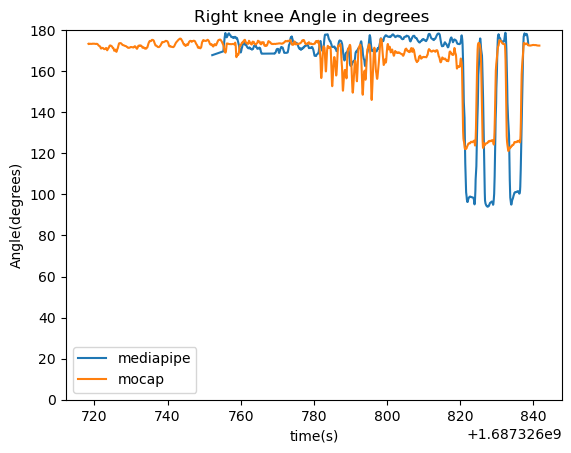

RMSE of right knee Angle: 11.517366882259012


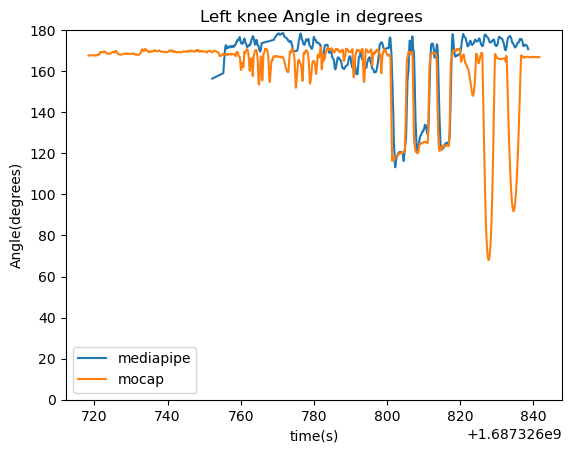

RMSE of left knee Angle: 19.676254169281133


In [51]:
#calculating the knee angle
mpipeRKa, mocapRKa=[],[]

for i in range(len(df_mpipe['epoch_time'].tolist())):
    mpipeRKa.append(angle3point([df_mpipe['RH_x'][i],df_mpipe['RH_y'][i],df_mpipe['RH_z'][i]],
                                [df_mpipe['RK_x'][i],df_mpipe['RK_y'][i],df_mpipe['RK_z'][i]],
                                [df_mpipe['RA_x'][i],df_mpipe['RA_y'][i],df_mpipe['RA_z'][i]]))
   
for i in range(len(df_mocap['epoch_time'].tolist())):
    mocapRKa.append(angle3point([df_mocap['RH_x'][i],df_mocap['RH_y'][i],df_mocap['RH_z'][i]],
                                [df_mocap['RK_x'][i],df_mocap['RK_y'][i],df_mocap['RK_z'][i]],
                                [df_mocap['RA_x'][i],df_mocap['RA_y'][i],df_mocap['RA_z'][i]]))
    
#test graph right knee angle 
pvt(mpipeRKa,df_mpipe['epoch_time'])
pvt(mocapRKa,df_mocap['epoch_time'])
plt.title('Right knee Angle in degrees ')
plt.xlabel('time(s)')
plt.ylabel('Angle(degrees)')
plt.legend(['mediapipe','mocap'])
plt.ylim(0,180)
plt.show()

print('RMSE of right knee Angle:',RMSE(mocapRKa,mpipeRKa,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

mpipeLKa, mocapLKa=[],[]

for i in range(len(df_mpipe['epoch_time'].tolist())):
    mpipeLKa.append(angle3point([df_mpipe['LH_x'][i],df_mpipe['LH_y'][i],df_mpipe['LH_z'][i]],
                                [df_mpipe['LK_x'][i],df_mpipe['LK_y'][i],df_mpipe['LK_z'][i]],
                                [df_mpipe['LA_x'][i],df_mpipe['LA_y'][i],df_mpipe['LA_z'][i]]))
   
for i in range(len(df_mocap['epoch_time'].tolist())):
    mocapLKa.append(angle3point([df_mocap['LH_x'][i],df_mocap['LH_y'][i],df_mocap['LH_z'][i]],
                                [df_mocap['LK_x'][i],df_mocap['LK_y'][i],df_mocap['LK_z'][i]],
                                [df_mocap['LA_x'][i],df_mocap['LA_y'][i],df_mocap['LA_z'][i]]))
   
# graph Left Knee angle
pvt(mpipeLKa,df_mpipe['epoch_time'])
pvt(mocapLKa,df_mocap['epoch_time'])
plt.title('Left knee Angle in degrees ')
plt.xlabel('time(s)')
plt.ylabel('Angle(degrees)')
plt.legend(['mediapipe','mocap'])
plt.ylim(0,180)
plt.show()
print('RMSE of left knee Angle:',RMSE(mocapLKa,mpipeLKa,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))


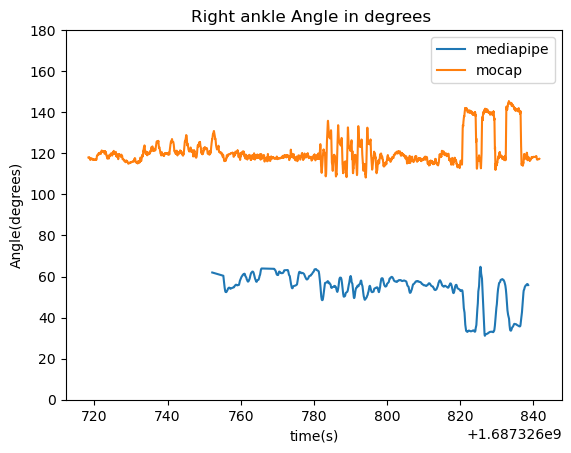

RMSE of right knee Angle: 69.28596154037983


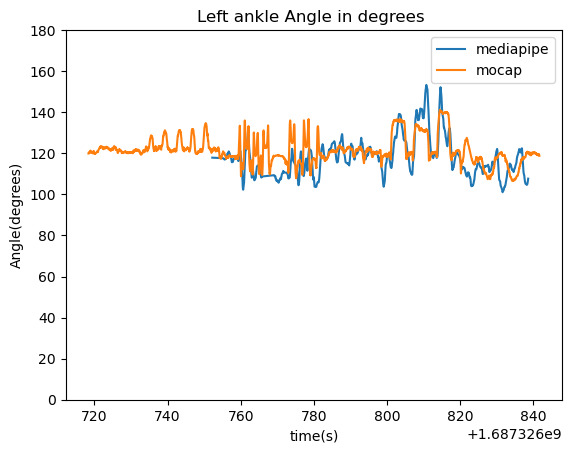

RMSE of left knee Angle: 6.728723366242792


In [52]:
#calculating the ankle angle
mpipeRAa, mocapRAa=[],[]

for i in range(len(df_mpipe['epoch_time'].tolist())):
    mpipeRAa.append(angle3point([df_mpipe['RT_x'][i],df_mpipe['RT_y'][i],df_mpipe['RT_z'][i]],
                                [df_mpipe['RA_x'][i],df_mpipe['RA_y'][i],df_mpipe['RA_z'][i]],
                                [df_mpipe['RK_x'][i],df_mpipe['RK_y'][i],df_mpipe['RK_z'][i]]))
   
for i in range(len(df_mocap['epoch_time'].tolist())):
    mocapRAa.append(angle3point([df_mocap['RT_x'][i],df_mocap['RT_y'][i],df_mocap['RT_z'][i]],
                                [df_mocap['RA_x'][i],df_mocap['RA_y'][i],df_mocap['RA_z'][i]],
                                [df_mocap['RK_x'][i],df_mocap['RK_y'][i],df_mocap['RK_z'][i]]))
    
# graph right knee angle
pvt(mpipeRAa,df_mpipe['epoch_time'])
pvt(mocapRAa,df_mocap['epoch_time'])
plt.title('Right ankle Angle in degrees ')
plt.xlabel('time(s)')
plt.ylabel('Angle(degrees)')
plt.legend(['mediapipe','mocap'])
plt.ylim(0,180)
plt.show()

print('RMSE of right knee Angle:',RMSE(mocapRAa,mpipeRAa,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

mpipeLAa, mocapLAa=[],[]

for i in range(len(df_mpipe['epoch_time'].tolist())):
    mpipeLAa.append(angle3point([df_mpipe['LT_x'][i],df_mpipe['LT_y'][i],df_mpipe['LT_z'][i]],
                                [df_mpipe['LA_x'][i],df_mpipe['LA_y'][i],df_mpipe['LA_z'][i]],
                                [df_mpipe['LK_x'][i],df_mpipe['LK_y'][i],df_mpipe['LK_z'][i]]))
   
for i in range(len(df_mocap['epoch_time'].tolist())):
    mocapLAa.append(angle3point([df_mocap['LT_x'][i],df_mocap['LT_y'][i],df_mocap['LT_z'][i]],
                                [df_mocap['LA_x'][i],df_mocap['LA_y'][i],df_mocap['LA_z'][i]],
                                [df_mocap['LK_x'][i],df_mocap['LK_y'][i],df_mocap['LK_z'][i]],))
   
# graph right knee angle 
pvt(mpipeLAa,df_mpipe['epoch_time'])
pvt(mocapLAa,df_mocap['epoch_time'])
plt.title('Left ankle Angle in degrees ')
plt.xlabel('time(s)')
plt.ylabel('Angle(degrees)')
plt.legend(['mediapipe','mocap'])
plt.ylim(0,180)
plt.show()
print('RMSE of left knee Angle:',RMSE(mocapLAa,mpipeLAa,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

In [53]:
def hip_frame(S,E,W):
    """"
        Find the vectors describing the local x,y,z axes of hip
    Parameters
    ----------
    S : hip point
    E : elbow point
    W : wrist point
        
    Returns
    -------
    numpy.ndarray
        An array of orthonormal vectors, where each column represents a vector.
    """
    S,E,W=np.array(S),np.array(E),np.array(W)
    upperarm=E-S
    lowerarm=W-E

    y=upperarm
    x=np.cross(upperarm,lowerarm)
    z=np.cross(x,y)
    return np.array([x,y,z]).T

def tr_frame(LS,RS,TR):
    """"
        Find the vectors describing the local x,y,z axes of trunk
    Parameters
    ----------
    LS : left hip point
    RS : right hip point
    TR : trunk/chest point
    
    Returns
    -------
    numpy.ndarray
        An array of orthonormal vectors, where each column represents a vector.
    """

    LS,RS,TR=np.array(LS),np.array(RS),np.array(TR)

    v1=LS-RS
    v2=TR-RS

    basis=gram_schmidt([v1,v2])
    try:
        v1,v2=basis[0],basis[1]
    except:
        return np.nan
    v3=np.cross(v1,v2)

    return np.array([v1,v2,v3]).T

def gram_schmidt(vectors):
    """
        Orthonormalize a set of vectors using the Gram-Schmidt process.

    Parameters
    ----------
    vectors : list of numpy.ndarray
        A list of vectors to be orthonormalized.

    Returns
    -------
    numpy.ndarray
        An array of orthonormal vectors, where each row represents a vector.
    """
    basis = []
    for v in vectors:
        w = v - sum(np.dot(v,b)*b for b in basis)
        if (w > 1e-10).any():
            basis.append(w/np.linalg.norm(w))
    return np.array(basis)


def rotation_matrix(frame1, frame2):
    """
    Calculate the rotation matrix that transforms frame1 to frame2.
    :param frame1: 3x3 numpy array representing the first coordinate frame
    :param frame2: 3x3 numpy array representing the second coordinate frame
    :return: 3x3 numpy array representing the rotation matrix
    """
    R = np.dot(frame2, np.linalg.inv(frame1))
    return R


In [54]:
# callibrating hips and torso

RHC_mpipe=hip_frame([df_mpipe['RH_x'][mpipe_cf],df_mpipe['RH_y'][mpipe_cf],df_mpipe['RH_z'][mpipe_cf]],
                         [df_mpipe['RK_x'][mpipe_cf],df_mpipe['RK_y'][mpipe_cf],df_mpipe['RK_z'][mpipe_cf]],
                         [df_mpipe['RT_x'][mpipe_cf],df_mpipe['RT_y'][mpipe_cf],df_mpipe['RT_z'][mpipe_cf]])

LHC_mpipe=hip_frame([df_mpipe['LH_x'][mpipe_cf],df_mpipe['LH_y'][mpipe_cf],df_mpipe['LH_z'][mpipe_cf]],
                         [df_mpipe['LK_x'][mpipe_cf],df_mpipe['LK_y'][mpipe_cf],df_mpipe['LK_z'][mpipe_cf]],
                         [df_mpipe['LT_x'][mpipe_cf],df_mpipe['LT_y'][mpipe_cf],df_mpipe['LT_z'][mpipe_cf]])

TRC_mpipe=tr_frame([df_mpipe['LH_x'][mpipe_cf],df_mpipe['LH_y'][mpipe_cf],df_mpipe['LH_z'][mpipe_cf]],
                   [df_mpipe['RH_x'][mpipe_cf],df_mpipe['RH_y'][mpipe_cf],df_mpipe['RH_z'][mpipe_cf]],
                   [df_mpipe['TR_x'][mpipe_cf],df_mpipe['TR_y'][mpipe_cf],df_mpipe['TR_z'][mpipe_cf]])

RHC_mocap=hip_frame([df_mocap['RH_x'][mocap_cf],df_mocap['RH_y'][mocap_cf],df_mocap['RH_z'][mocap_cf]],
                         [df_mocap['RK_x'][mocap_cf],df_mocap['RK_y'][mocap_cf],df_mocap['RK_z'][mocap_cf]],
                         [df_mocap['RT_x'][mocap_cf],df_mocap['RT_y'][mocap_cf],df_mocap['RT_z'][mocap_cf]])

LHC_mocap=hip_frame([df_mocap['LH_x'][mocap_cf],df_mocap['LH_y'][mocap_cf],df_mocap['LH_z'][mocap_cf]],
                         [df_mocap['LK_x'][mocap_cf],df_mocap['LK_y'][mocap_cf],df_mocap['LK_z'][mocap_cf]],
                         [df_mocap['LT_x'][mocap_cf],df_mocap['LT_y'][mocap_cf],df_mocap['LT_z'][mocap_cf]])

TRC_mocap=tr_frame([df_mocap['LH_x'][mocap_cf],df_mocap['LH_y'][mocap_cf],df_mocap['LH_z'][mocap_cf]],
                   [df_mocap['RH_x'][mocap_cf],df_mocap['RH_y'][mocap_cf],df_mocap['RH_z'][mocap_cf]],
                   [df_mocap['TR_x'][mocap_cf],df_mocap['TR_y'][mocap_cf],df_mocap['TR_z'][mocap_cf]])

In [55]:
# calculating the euler angles

# knee angle threshold for calculating internal/external rotation
kath = 150

# mpipe values
mpipeRHFE,mpipeRHAA,mpipeRHIE=[],[],[]
mpipeLHFE,mpipeLHAA,mpipeLHIE=[],[],[]
mpipeTRFB,mpipeTRLR,mpipeTRRO=[],[],[]

for i in range(len(df_mpipe['epoch_time'].tolist())):

    # finding the ith hip/trunk frames
    mpipeRHF=hip_frame([df_mpipe['RH_x'][i],df_mpipe['RH_y'][i],df_mpipe['RH_z'][i]],
                            [df_mpipe['RK_x'][i],df_mpipe['RK_y'][i],df_mpipe['RK_z'][i]],
                            [df_mpipe['RT_x'][i],df_mpipe['RT_y'][i],df_mpipe['RT_z'][i]])
   
    mpipeLHF=hip_frame([df_mpipe['LH_x'][i],df_mpipe['LH_y'][i],df_mpipe['LH_z'][i]],
                            [df_mpipe['LK_x'][i],df_mpipe['LK_y'][i],df_mpipe['LK_z'][i]],
                            [df_mpipe['LT_x'][i],df_mpipe['LT_y'][i],df_mpipe['LT_z'][i]])
   
    mpipeTRF=tr_frame([df_mpipe['LH_x'][i],df_mpipe['LH_y'][i],df_mpipe['LH_z'][i]],
                      [df_mpipe['RH_x'][i],df_mpipe['RH_y'][i],df_mpipe['RH_z'][i]],  
                      [df_mpipe['TR_x'][i],df_mpipe['TR_y'][i],df_mpipe['TR_z'][i]])
   
    # finding the rotation matrix from callibration trunk frame to ith trunk frame
    mpipeTR_rotmat=rotation_matrix(TRC_mpipe,mpipeTRF)

    # rotating hip callibration frame by same the rotation matrix
    mpipe_rotated_RH_Cframe=mpipeTR_rotmat@RHC_mpipe
    mpipe_rotated_LH_Cframe=mpipeTR_rotmat@LHC_mpipe

    # now finding rotation matrix from rotated hip callibration frame to ith hip frame
    mpipeRH_rotmat=rotation_matrix(mpipe_rotated_RH_Cframe,mpipeRHF)
    mpipeLH_rotmat=rotation_matrix(mpipe_rotated_LH_Cframe,mpipeLHF)

    # finding euler angles from rotation matrices
    RHeuler=rotation_angles(mpipeRH_rotmat)
    LHeuler=rotation_angles(mpipeLH_rotmat)
    TReuler=rotation_angles(mpipeTR_rotmat)

    # appending to angle lists
    mpipeRHFE.append(RHeuler[0])
    mpipeRHAA.append(RHeuler[1])
    if mpipeRKa[i] < kath:
        mpipeRHIE.append(RHeuler[2])
    else:
        mpipeRHIE.append(np.nan)

    mpipeLHFE.append(LHeuler[0])
    mpipeLHAA.append(LHeuler[1])
    if mpipeLKa[i] < kath:
        mpipeLHIE.append(LHeuler[2])
    else:
        mpipeLHIE.append(np.nan)

    mpipeTRFB.append(TReuler[0])
    mpipeTRLR.append(TReuler[1])
    mpipeTRRO.append(TReuler[2])

# mocap values
mocapRHFE,mocapRHAA,mocapRHIE=[],[],[]
mocapLHFE,mocapLHAA,mocapLHIE=[],[],[]
mocapTRFB,mocapTRLR,mocapTRRO=[],[],[]


for i in range(len(df_mocap['epoch_time'].tolist())):

    # finding the ith hip/trunk frames
    mocapRHF=hip_frame([df_mocap['RH_x'][i],df_mocap['RH_y'][i],df_mocap['RH_z'][i]],
                            [df_mocap['RK_x'][i],df_mocap['RK_y'][i],df_mocap['RK_z'][i]],
                            [df_mocap['RA_x'][i],df_mocap['RA_y'][i],df_mocap['RA_z'][i]])
   
    mocapLHF=hip_frame([df_mocap['LH_x'][i],df_mocap['LH_y'][i],df_mocap['LH_z'][i]],
                            [df_mocap['LK_x'][i],df_mocap['LK_y'][i],df_mocap['LK_z'][i]],
                            [df_mocap['LA_x'][i],df_mocap['LA_y'][i],df_mocap['LA_z'][i]])
   
    mocapTRF=tr_frame([df_mocap['LH_x'][i],df_mocap['LH_y'][i],df_mocap['LH_z'][i]],
                      [df_mocap['RH_x'][i],df_mocap['RH_y'][i],df_mocap['RH_z'][i]],  
                      [df_mocap['TR_x'][i],df_mocap['TR_y'][i],df_mocap['TR_z'][i]])
   
    # finding the rotation matrix from callibration trunk frame to ith trunk frame
    mocapTR_rotmat=rotation_matrix(TRC_mocap,mocapTRF)

    # rotating hip callibration frame by same the rotation matrix
    mocap_rotated_RH_Cframe=mocapTR_rotmat@RHC_mocap
    mocap_rotated_LH_Cframe=mocapTR_rotmat@LHC_mocap

    # now finding rotation matrix from rotated hip callibration frame to ith hip frame
    mocapRH_rotmat=rotation_matrix(mocap_rotated_RH_Cframe,mocapRHF)
    mocapLH_rotmat=rotation_matrix(mocap_rotated_LH_Cframe,mocapLHF)

    # finding euler angles from rotation matrices
    RHeuler=rotation_angles(mocapRH_rotmat)
    LHeuler=rotation_angles(mocapLH_rotmat)
    TReuler=rotation_angles(mocapTR_rotmat)

    # appending to angle lists
    mocapRHFE.append(RHeuler[0])
    mocapRHAA.append(RHeuler[1])
    if mocapRKa[i] < kath:
        mocapRHIE.append(RHeuler[2])
    else:
        mocapRHIE.append(np.nan)

    mocapLHFE.append(LHeuler[0])
    mocapLHAA.append(LHeuler[1])
    if mocapLKa[i] < kath:
        mocapLHIE.append(LHeuler[2])
    else:
        mocapLHIE.append(np.nan)

    mocapTRFB.append(TReuler[0])
    mocapTRLR.append(TReuler[1])
    mocapTRRO.append(TReuler[2])

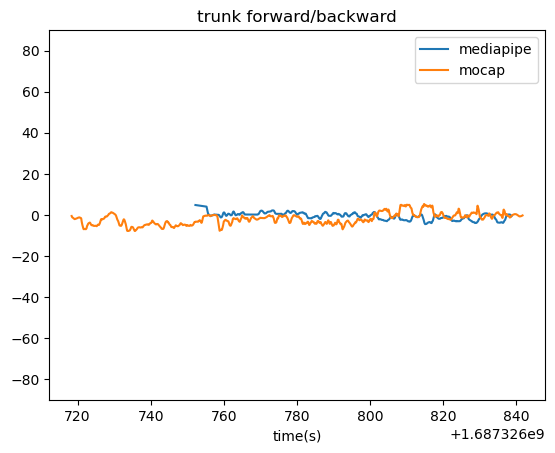

RMSE of forward/backward:  3.484772461086101


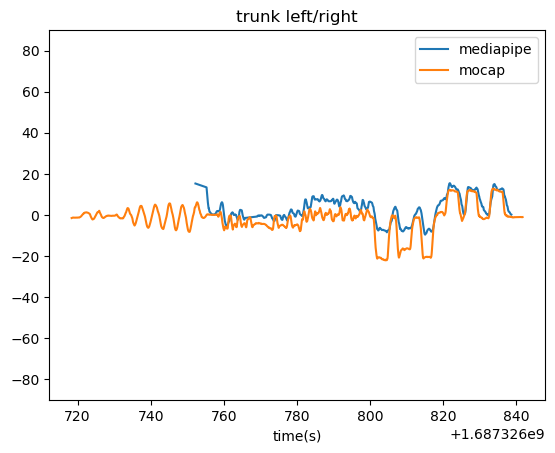

RMSE of left/right:  6.188761055899008


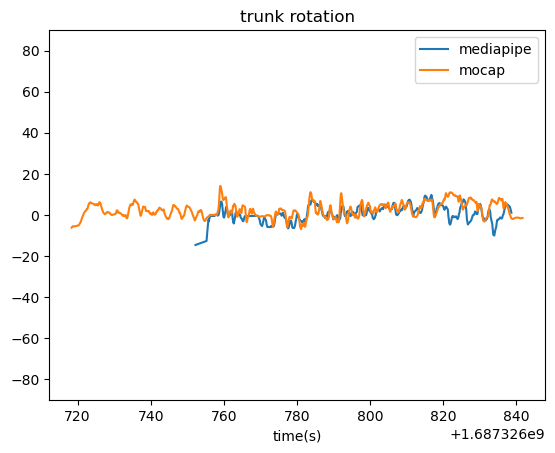

RMSE of rotation:  4.027224871369577


In [56]:
# plotting the trunk angles
pvt(mpipeTRFB,df_mpipe['epoch_time'])
pvt(mocapTRFB,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('trunk forward/backward')
plt.ylim(-90,90)
plt.show()

print('RMSE of forward/backward: ',RMSE(mocapTRFB,mpipeTRFB,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

pvt(mpipeTRLR,df_mpipe['epoch_time'])
pvt(mocapTRLR,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('trunk left/right')
plt.ylim(-90,90)
plt.show()

print('RMSE of left/right: ',RMSE(mocapTRLR,mpipeTRLR,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

pvt(mpipeTRRO,df_mpipe['epoch_time'].tolist())
pvt(mocapTRRO,df_mocap['epoch_time'].tolist())
plt.legend(['mediapipe','mocap'])
plt.title('trunk rotation')
plt.ylim(-90,90)
plt.show()

print('RMSE of rotation: ',RMSE(mocapTRRO,mpipeTRRO,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

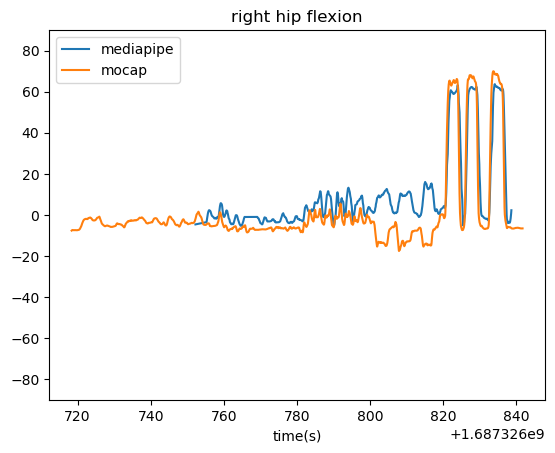

RMSE of flexion/extension:  11.040358766133693


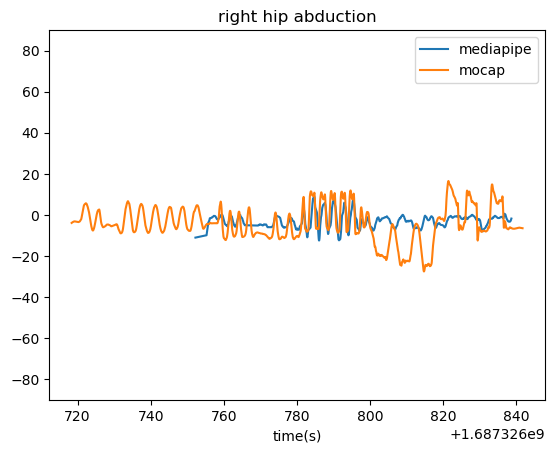

RMSE of abduct/adduct:  8.431813937547922


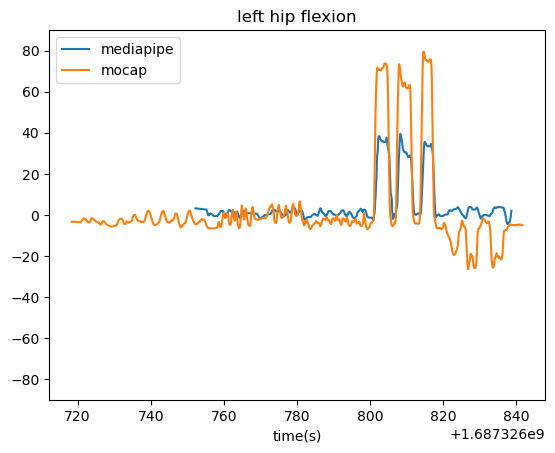

RMSE of flexion/extension:  14.160635033056419


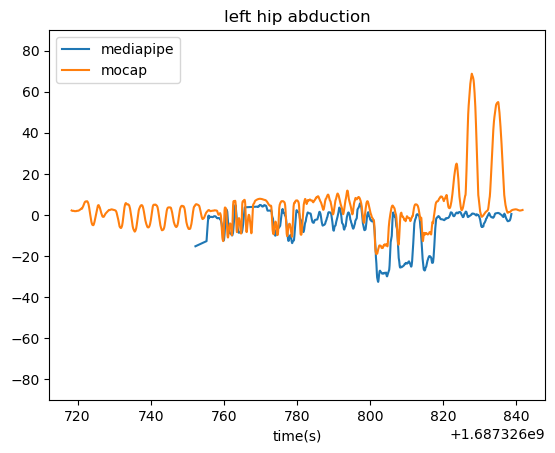

RMSE of abduct/adduct:  15.043013650077278


In [57]:
# Plotting the hip angles
pvt(mpipeRHFE,df_mpipe['epoch_time'])
pvt(mocapRHFE,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('right hip flexion')
plt.ylim(-90,90)
plt.show()


print('RMSE of flexion/extension: ',RMSE(mocapRHFE,mpipeRHFE,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))


pvt(mpipeRHAA,df_mpipe['epoch_time'])
pvt(mocapRHAA,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('right hip abduction')
plt.ylim(-90,90)
plt.show()


print('RMSE of abduct/adduct: ',RMSE(mocapRHAA,mpipeRHAA,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))


# pvt(mpipeRHIE,df_mpipe['epoch_time'].tolist())
# pvt(mocapRHIE,df_mocap['epoch_time'].tolist())
# plt.legend(['mediapipe','mocap'])
# plt.title('right hip internal/external rotation')
# plt.ylim(-90,90)
# plt.show()


# print('RMSE of internal/external rotation: ',RMSE(mocapRHIE,mpipeRHIE,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))


pvt(mpipeLHFE,df_mpipe['epoch_time'])
pvt(mocapLHFE,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('left hip flexion')
plt.ylim(-90,90)
plt.show()


print('RMSE of flexion/extension: ',RMSE(mocapLHFE,mpipeLHFE,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))


pvt(mpipeLHAA,df_mpipe['epoch_time'])
pvt(mocapLHAA,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('left hip abduction')
plt.ylim(-90,90)
plt.show()


print('RMSE of abduct/adduct: ',RMSE(mocapLHAA,mpipeLHAA,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))


# pvt(mpipeLHIE,df_mpipe['epoch_time'].tolist())
# pvt(mocapLHIE,df_mocap['epoch_time'].tolist())
# plt.legend(['mediapipe','mocap'])
# plt.title('left hip internal/external rotation')
# plt.ylim(-90,90)
# plt.show()


# print('RMSE of internal/external rotation: ',RMSE(mocapLHIE,mpipeLHIE,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))